# Etapa 1: Compreensão Inicial dos Dados

In [1]:
# Bibliotecas necessárias para o projeto

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
df = pd.read_csv('../data/creditcard.csv', sep=',', encoding='UTF-8')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,...,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000
mean,67472.753699,-0.123262,0.011192,0.372657,0.087088,-0.132063,0.050776,-0.060121,0.021925,0.011903,...,-0.017942,-0.058597,-0.017657,0.005437,0.070404,0.007942,0.001779,0.002104,89.239816,0.001953
std,32573.999853,1.882621,1.619740,1.431349,1.391989,1.356669,1.306751,1.213169,1.212479,1.139985,...,0.739649,0.684510,0.604654,0.602432,0.483171,0.489305,0.392889,0.310538,248.106606,0.044146
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43234.000000,-0.968508,-0.571526,-0.250238,-0.779422,-0.798475,-0.704009,-0.580287,-0.175384,-0.661807,...,-0.228079,-0.540579,-0.169167,-0.339337,-0.227662,-0.331227,-0.066777,-0.038392,5.990000,0.000000
50%,65122.000000,-0.115844,0.087002,0.533572,0.089263,-0.187758,-0.213408,-0.017549,0.047006,-0.075014,...,-0.046333,-0.044542,-0.031035,0.054482,0.114247,-0.060704,0.006817,0.019263,22.800000,0.000000
75%,84756.000000,1.203685,0.787105,1.247928,0.903544,0.436792,0.446211,0.487953,0.341655,0.630348,...,0.144500,0.405311,0.110240,0.419939,0.389045,0.264696,0.089266,0.078149,79.000000,0.000000
max,128643.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [21]:
df.isnull().sum().max()

np.int64(0)

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189999 entries, 0 to 189998
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    189999 non-null  float64
 1   V1      189999 non-null  float64
 2   V2      189999 non-null  float64
 3   V3      189999 non-null  float64
 4   V4      189999 non-null  float64
 5   V5      189999 non-null  float64
 6   V6      189999 non-null  float64
 7   V7      189999 non-null  float64
 8   V8      189999 non-null  float64
 9   V9      189999 non-null  float64
 10  V10     189999 non-null  float64
 11  V11     189999 non-null  float64
 12  V12     189999 non-null  float64
 13  V13     189999 non-null  float64
 14  V14     189999 non-null  float64
 15  V15     189999 non-null  float64
 16  V16     189999 non-null  float64
 17  V17     189999 non-null  float64
 18  V18     189999 non-null  float64
 19  V19     189999 non-null  float64
 20  V20     189999 non-null  float64
 21  V21     18

- Verificando se meus dados estão balancedos por meio da distribuição da Coluna class da amostra dos dados.

In [26]:
df['Class'].value_counts()


Class
0    189628
1       371
Name: count, dtype: int64

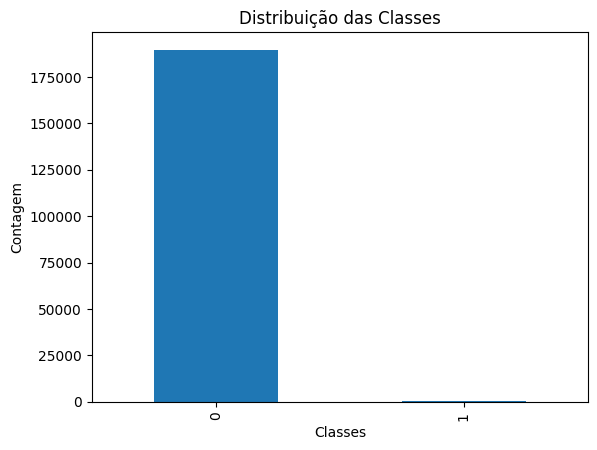

In [27]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()

In [28]:
class_counts = df['Class'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Razão de desbalanceamento: {imbalance_ratio}")

Razão de desbalanceamento: 511.1266846361186


In [31]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% do conjunto de dados')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% do conjunto de dados')

No Frauds 99.8 % do conjunto de dados
Frauds 0.2 % do conjunto de dados


- Neste contexto, os resultados do comando mostram que a classe 0 ("No Frauds") possui 189.628 amostras, enquanto a classe 1 ("Frauds") conta com apenas 371 amostras, resultando em uma razão de desbalanceamento de 511. Uma razão de 10 ou mais é geralmente considerada um desbalanceamento elevado. Com esses números, podemos concluir que há um desbalanceamento extremo nos dados, já que a classe 0 é significativamente mais representativa do que a classe 1.
- Se usarmos esse dataframe como base para nossos modelos preditivos e análises, podemos obter muitos erros e nossos algoritmos provavelmente se ajustarão demais, pois "assumirão" que a maioria das transações não é fraude.

### 1.1 Estratégias para lidar com o desbalanceamento.